In [4]:
import featureeng as feng
import data.readers as rd
import time
import warnings
from warnings import simplefilter
from featureeng.features import *

warnings.filterwarnings("ignore")
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

instrument = 'EURGBP'
year = 2021

start_time = time.time()
ticks_EURGBP = rd.read_in_ticks('/data', instrument, year)

end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

EURGBP - /data
/data/EURGBP/2021
Execution time: 2.001 seconds


In [5]:
def fill_data(df):
    df['close'] = df['close'].ffill()
    df['close'] = df['close'].bfill()
    
    df['midPoint'] = df['midPoint'].ffill()
    df['midPoint'] = df['midPoint'].bfill()
    
    df['Spread'] = df['Spread'].ffill()
    df['Spread'] = df['Spread'].bfill()
    return df

processed_EURGBP = fill_data(process_df_count(ticks_EURGBP, '1s'))
processed_EURGBP_2 =fill_data(process_df_count(ticks_EURGBP, '1min'))


In [3]:
processed_EURGBP_2[0:10]

,open,high,low,close,midPoint,Count,Spread
DateTime,,,,,,,
2021-01-03 22:01:00,0.896110,0.896440,0.896110,0.896440,0.896275,26,14.973077
2021-01-03 22:02:00,0.896450,0.896665,0.896450,0.896530,0.896558,6,12.233333
2021-01-03 22:03:00,0.896520,0.896520,0.896415,0.896415,0.896467,4,12.475000
2021-01-03 22:04:00,0.896340,0.896350,0.896340,0.896350,0.896345,3,12.533333
2021-01-03 22:05:00,0.896220,0.896350,0.896165,0.896265,0.896257,14,11.214286
2021-01-03 22:06:00,0.896350,0.896350,0.896040,0.896125,0.896195,29,10.044828
2021-01-03 22:07:00,0.896130,0.896195,0.896080,0.896080,0.896138,19,8.563158
2021-01-03 22:08:00,0.896095,0.896380,0.895975,0.896135,0.896177,17,11.741176
2021-01-03 22:09:00,0.896140,0.896260,0.896100,0.896170,0.896180,11,13.527273


In [6]:
merged_df = pd.merge_asof(processed_EURGBP, processed_EURGBP_2, left_index=True, right_index=True, direction='backward', suffixes=('', '_1min'))


In [7]:
pd.set_option('display.max_rows', 200)

merged_df[33890:34025]

,open,high,low,close,midPoint,Count,Spread,open_1min,high_1min,low_1min,close_1min,midPoint_1min,Count_1min,Spread_1min
DateTime,,,,,,,,,,,,,,
2021-01-04 07:24:51,0.895485,0.895485,0.895485,0.895485,0.895485,1,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:52,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:53,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:54,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:55,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:56,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:57,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:58,NaN,NaN,NaN,0.895485,0.895485,0,3.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000
2021-01-04 07:24:59,0.895480,0.895480,0.895480,0.895480,0.895480,1,4.000000e-01,0.895420,0.895520,0.895380,0.895470,0.895450,120.0,0.355000


In [3]:
print(processed_EURGBP.memory_usage(deep=True).sum())

1751104264


In [4]:
def process(df):
    import cudf
    df = cudf.from_pandas(df)
    # Assuming you have a cudf DataFrame 'gdf' and a 'close' column

    for window_size in [900, 1800,3600,7200]:
        # Apply the rolling window and calculate the mean for each window
        df[f"MA_{window_size}"] = df['close'].rolling(window=window_size).mean()
        df[f"MA_{window_size}_diff"] = (df['close'] - df[f"MA_{window_size}"])*10000
        
    return df.to_pandas()




start_time = time.time()
processed_EURGBP_2 = process(processed_EURGBP)
end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

Execution time: 5.749 seconds


In [5]:
with pd.option_context('display.max_rows', 100):
    print(processed_EURGBP_2[-100:])

                         open      high       low     close  Count    Spread  \
DateTime                                                                       
2021-12-31 20:00:20  0.841185  0.841185  0.841185  0.841185      1  0.300000   
2021-12-31 20:00:21  0.841180  0.841185  0.841180  0.841180      3  0.433333   
2021-12-31 20:00:22  0.841175  0.841175  0.841175  0.841175      1  0.500000   
2021-12-31 20:00:23       NaN       NaN       NaN  0.841175      0  0.500000   
2021-12-31 20:00:24       NaN       NaN       NaN  0.841175      0  0.500000   
2021-12-31 20:00:25       NaN       NaN       NaN  0.841175      0  0.500000   
2021-12-31 20:00:26       NaN       NaN       NaN  0.841175      0  0.500000   
2021-12-31 20:00:27  0.841170  0.841170  0.841170  0.841170      1  0.600000   
2021-12-31 20:00:28       NaN       NaN       NaN  0.841170      0  0.600000   
2021-12-31 20:00:29       NaN       NaN       NaN  0.841170      0  0.600000   
2021-12-31 20:00:30       NaN       NaN 

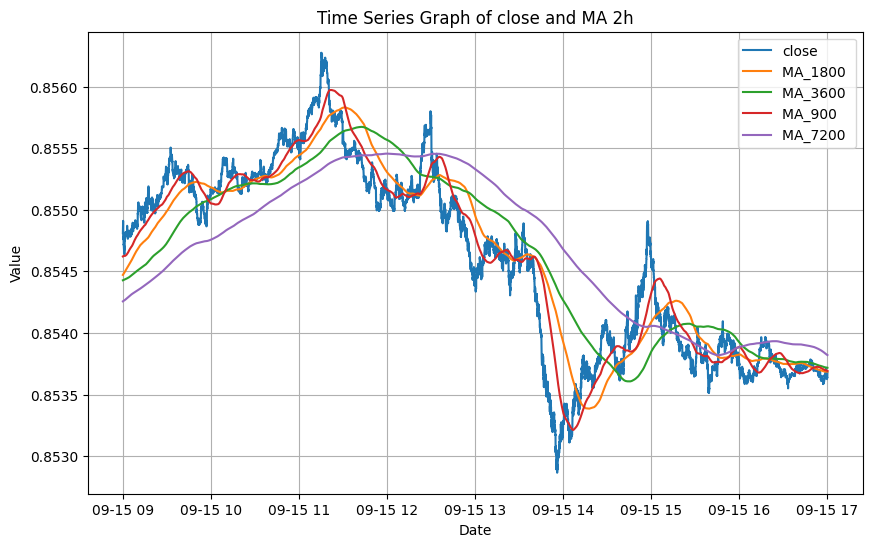

Skewness: -0.006859705255727433
Mean: -0.08778424085642383, 
 Median: -4.918287999089443e-10, 
 Standard Deviation: 2.3873043321561354
 Variance: 5.699221974331451
Kurtosis: 4.493548621503316
Interquartile Range (IQR): 1.4398611109511794


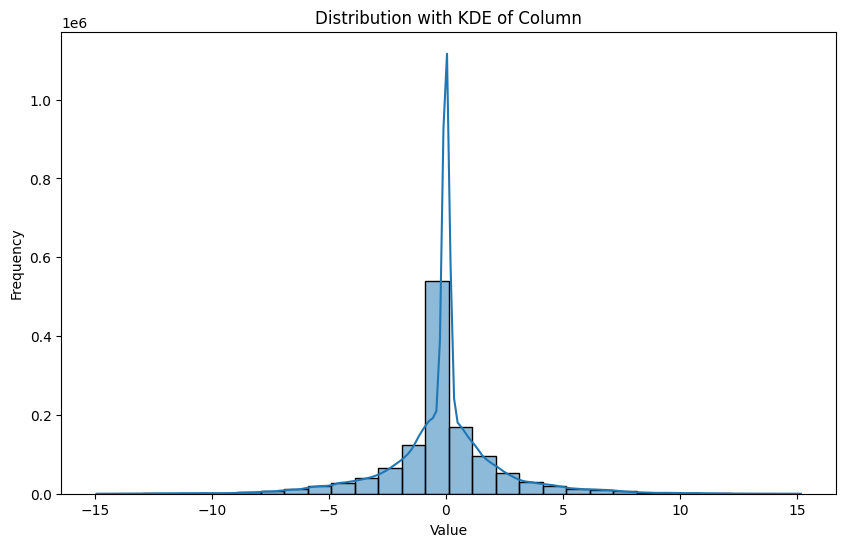

In [7]:
import matplotlib.pyplot as plt

def show_plot(df_full, start, end):
    df = df_full[start:end]
    # Assuming df is your DataFrame, with columns 'column1' and 'column2'
    
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(df.index, df['close'], label='close')  # Plot column 1
    plt.plot(df.index, df['MA_1800'], label='MA_1800 ')  # Plot column 2
    plt.plot(df.index, df['MA_3600'], label='MA_3600 ')  # Plot column 2
    plt.plot(df.index, df['MA_900'], label='MA_900 ')  # Plot column 2
    plt.plot(df.index, df['MA_7200'], label='MA_7200 ')  # Plot column 2
    
    plt.title('Time Series Graph of close and MA 2h')  # Add a title
    plt.xlabel('Date')  # Add X-axis label
    plt.ylabel('Value')  # Add Y-axis label
    plt.legend()  # Add a legend
    plt.grid(True)  # Add gridlines
    
    plt.show()

def show_plot_2(df_full, start, end):
    df = df_full[start:end]
    # Assuming df is your DataFrame, with columns 'column1' and 'column2'
    
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(df.index, df['MA_1800_diff'], label='MA_1800_diff ')  # Plot column 2
    plt.plot(df.index, df['MA_3600_diff'], label='MA_3600_diff ')  # Plot column 2
    plt.plot(df.index, df['MA_7200_diff'], label='MA_7200_diff ')  # Plot column 2
    
    plt.title('Time Series Graph of close and MA 2h')  # Add a title
    plt.xlabel('Date')  # Add X-axis label
    plt.ylabel('Value')  # Add Y-axis label
    plt.legend()  # Add a legend
    plt.grid(True)  # Add gridlines
    
    plt.show()

def analysis(df_full, start, end, col_name):
    from scipy import stats
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    df = df_full[start:end]
    

    # Sample DataFrame and column
    # df = pd.DataFrame({'column_name': [...your data...]})
    
    # Basic Statistics
    mean = df[col_name].mean()
    median = df[col_name].median()
    std_dev = df[col_name].std()
    kurtosis = df[col_name].kurt()
    variance = df[col_name].var()
    
    # Interquartile Range
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    skewness = df[col_name].skew()
    print(f"Skewness: {skewness}")
    print(f"Mean: {mean}, \n Median: {median}, \n Standard Deviation: {std_dev}\n Variance: {variance}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Interquartile Range (IQR): {IQR}")

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], kde=True, bins=30)
    plt.title('Distribution with KDE of Column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # plt.figure(figsize=(8, 6))
    # sns.boxplot(x=df[col_name])
    # plt.title('Box Plot of Column')
    # plt.show()

    # plt.figure(figsize=(8, 6))
    # stats.probplot(df[col_name], dist="norm", plot=plt)
    # plt.title('Q-Q Plot')
    # plt.show()


show_plot(processed_EURGBP_2, '2021-09-15 09:00:00', '2021-09-15 17:00:00')


analysis(processed_EURGBP_2, '2021-09-03 08:00:00', '2021-09-17 17:00:00', 'MA_3600_diff')

In [8]:
import pandas as pd

def my_function2(data):
    return data.mean()

start_time = time.time()

#del df

df = processed_EURGBP_2.copy()#['2021-08-15 09:00:00':'2021-09-15 23:59:59']

reversed_df = df.iloc[::-1]

# Apply the rolling function and reverse the result back
for window_size_min in [30, 60, 90, 120]:
    df[f"max_ahead_{window_size_min}"] = reversed_df['close'].rolling(window=60*window_size_min).max().iloc[::-1]
    df[f"min_ahead_{window_size_min}"] = reversed_df['close'].rolling(window=60*window_size_min).min().iloc[::-1]
    for target_column_base in ['close', 'MA_900', 'MA_1800', 'MA_3600', 'MA_7200']:
        target_up =  df[f"max_ahead_{window_size_min}"] - df[target_column_base]
        target_down = df[f"min_ahead_{window_size_min}"] - df[target_column_base]
        df[f"target_{target_column_base}_{window_size_min}"] = (target_up.where(target_up > abs(target_down), target_down))*10000

end_time = time.time()
print(f'Execution time: {end_time - start_time:.3f} seconds')

Execution time: 9.630 seconds


In [9]:
target_columns = [col for col in df.columns if col.startswith('target_')]
print(target_columns)

['target_close_30', 'target_MA_900_30', 'target_MA_1800_30', 'target_MA_3600_30', 'target_MA_7200_30', 'target_close_60', 'target_MA_900_60', 'target_MA_1800_60', 'target_MA_3600_60', 'target_MA_7200_60', 'target_close_90', 'target_MA_900_90', 'target_MA_1800_90', 'target_MA_3600_90', 'target_MA_7200_90', 'target_close_120', 'target_MA_900_120', 'target_MA_1800_120', 'target_MA_3600_120', 'target_MA_7200_120']


Skewness: -0.03665891779073305
Mean: -0.06268671875436455, 
 Median: 0.0, 
 Standard Deviation: 6.364520930995004
 Variance: 40.50712668107352
Kurtosis: 0.5444492089335808
Interquartile Range (IQR): 8.749999999999591


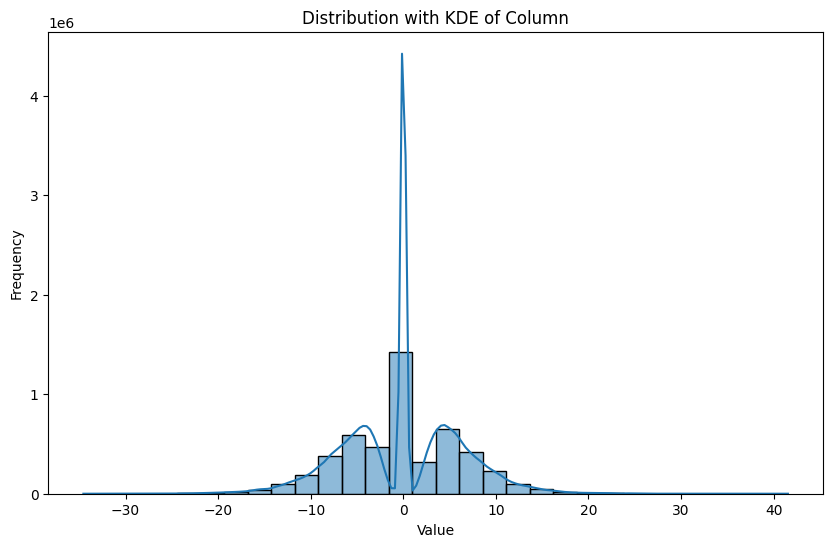

In [10]:
analysis(df.between_time('13:00', '17:00'), '2021-01-03 08:00:00', '2021-12-17 17:00:00', 'target_close_30')

<Axes: >

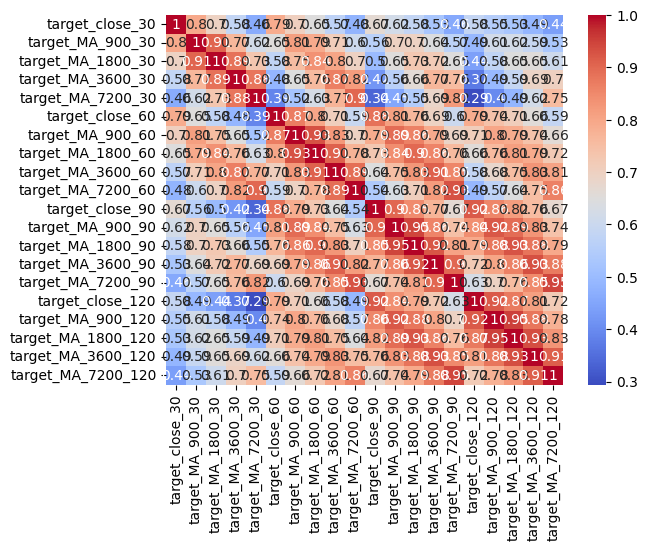

In [11]:
import seaborn as sns

sns.heatmap(df[target_columns].corr(), annot=True, cmap='coolwarm')


In [12]:
df['2021-09-15 11:00:00':'2021-09-15 17:00:00']

,open,high,low,close,Count,Spread,MA_900,MA_900_diff,MA_1800,MA_1800_diff,...,target_MA_1800_90,target_MA_3600_90,target_MA_7200_90,max_ahead_120,min_ahead_120,target_close_120,target_MA_900_120,target_MA_1800_120,target_MA_3600_120,target_MA_7200_120
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-09-15 11:00:00,NaN,NaN,NaN,0.855510,0,0.400000,0.855566,-0.563667,0.855443,0.667000,...,8.317000,9.298181,10.595792,0.856275,0.854385,-11.25,-11.813667,-10.583000,-9.601819,10.595792
2021-09-15 11:00:01,0.855505,0.855510,0.855505,0.855510,2,0.350000,0.855566,-0.563833,0.855443,0.665750,...,8.315750,9.297139,10.594833,0.856275,0.854385,-11.25,-11.813833,-10.584250,-9.602861,10.594833
2021-09-15 11:00:02,0.855505,0.855505,0.855495,0.855500,3,0.400000,0.855566,-0.663889,0.855444,0.564500,...,8.314500,9.296167,10.593889,0.856275,0.854385,-11.15,-11.813889,-10.585500,-9.603833,10.593889
2021-09-15 11:00:03,0.855505,0.855505,0.855505,0.855505,1,0.300000,0.855566,-0.614111,0.855444,0.613222,...,8.313222,9.295181,10.592944,0.856275,0.854385,-11.20,-11.814111,-10.586778,-9.604819,10.592944
2021-09-15 11:00:04,0.855485,0.855485,0.855485,0.855485,1,0.500000,0.855566,-0.814111,0.855444,0.412056,...,8.312056,9.294250,10.592042,0.856275,0.854385,-11.00,-11.814111,-10.587944,-9.605750,10.592042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15 16:59:56,0.853640,0.853670,0.853640,0.853660,6,0.333333,0.853692,-0.316889,0.853686,-0.260833,...,-4.360833,-4.672597,-5.707382,0.853905,0.853250,-4.10,-4.416889,-4.360833,-4.672597,-5.707382
2021-09-15 16:59:57,NaN,NaN,NaN,0.853660,0,0.333333,0.853692,-0.316278,0.853686,-0.260833,...,-4.360833,-4.672347,-5.706118,0.853905,0.853250,-4.10,-4.416278,-4.360833,-4.672347,-5.706118
2021-09-15 16:59:58,NaN,NaN,NaN,0.853660,0,0.333333,0.853692,-0.315722,0.853686,-0.260806,...,-4.360806,-4.672111,-5.704854,0.853905,0.853250,-4.10,-4.415722,-4.360806,-4.672111,-5.704854


In [13]:

for idx, row in df[0:120].iterrows():
    print(f"{row['min_ahead']} {row['max_ahead']} - {idx} - {processed_EURGBP_2_cudf['new_col'].loc[idx]}")


KeyError: 'min_ahead'

In [ ]:
processed_EURGBP_2_cudf['close'][0:100].mean()